In [1]:
%load_ext rpy2.ipython

In [2]:
# %%R
# install.packages('MuMIn', repos='http://cran.us.r-project.org')

In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import gridspec
import seaborn as sns
import pingouin as pg
import copy
import re
import pickle
import os

In [4]:
import matplotlib
matplotlib.__version__

/home/srj34/deeplabcut-env/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/home/srj34/deeplabcut-env/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


'3.0.3'

In [5]:
import shap
import tensorflow
print(shap.__version__, "\n",tensorflow.__version__)

0.40.0 
 1.13.1


In [6]:
import sklearn.datasets as skds
from pathlib import Path
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
randomstate = 1234
# For reproducibility
np.random.seed(randomstate)

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.datasets import make_multilabel_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [11]:
import matplotlib.pyplot as plt
font = {'family': 'sans-serif', 'serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('text', usetex=False)

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

In [13]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [14]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 1000)

In [15]:
def save_obj(obj, name, fname ):
    with open(fname+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(fname + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [16]:
label_fontsize = 16 
title_fontsize = 18

In [17]:
sns.set(style="ticks")

In [18]:
reference = 'neutral' #'neutral','diff'

In [19]:
basefolder = "/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/"

In [20]:
inputfolderpath = basefolder + "drosSleepStages_SciAdvances2023/data/lfp_data/spectrum/forestclassifier/"

In [21]:
outputfolderpath = basefolder + "SleepOnset_Drosophila/Scripts/pics/stats_grouplevel/"

In [22]:
datasetpath = inputfolderpath
datasetpath +=  "merged_Spectrum_CSV_" + reference + "_ref" + ".csv"
datasetpath

'/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/drosSleepStages_SciAdvances2023/data/lfp_data/spectrum/forestclassifier/merged_Spectrum_CSV_neutral_ref.csv'

In [23]:
classifierfolderpath = inputfolderpath + "classifier_rf_files/"

In [24]:
# We have training data available as csv file
features_df = pd.read_csv(datasetpath)

In [25]:
features_df

,freq4.88_chan01,freq4.88_chan02,freq4.88_chan03,freq4.88_chan04,freq4.88_chan05,freq4.88_chan06,freq4.88_chan07,freq4.88_chan08,freq4.88_chan09,freq4.88_chan10,...,freq40.04_chan11,freq40.04_chan12,freq40.04_chan13,freq40.04_chan14,freq40.04_chan15,start_time,end_time,state,depth,fly
0,16.907746,18.031327,16.695582,16.928798,15.740280,13.882950,12.989385,13.230149,12.057229,12.278152,...,3.228627,-0.163291,3.477128,5.864448,10.546624,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min01,27072018_SponSleep_LFP
1,18.219623,17.288638,14.989972,14.163098,13.005335,11.676813,10.656620,9.535862,8.410238,8.727287,...,2.609511,-2.032236,0.119382,-0.759690,1.761731,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min02,27072018_SponSleep_LFP
2,19.019229,18.067138,16.807576,16.786777,16.122223,15.413145,15.789958,13.978603,13.332066,12.588074,...,8.372123,3.774294,9.054524,11.292854,15.218561,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min03,27072018_SponSleep_LFP
3,17.412197,15.146518,13.969461,13.137674,12.669202,12.023402,10.728541,10.636679,9.142379,8.341223,...,1.538661,-2.308884,-1.166614,0.845271,0.130059,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min04,27072018_SponSleep_LFP
4,16.852660,15.657018,15.303795,15.510230,15.219867,14.411664,14.829397,14.049612,12.047110,12.566136,...,9.052597,2.516190,11.085336,13.465725,17.404638,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min05,27072018_SponSleep_LFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9216,5.384316,4.520180,4.416598,4.200604,2.423884,1.408764,2.341573,1.330297,2.545163,-0.069842,...,-4.562900,-4.254393,-5.182509,-3.241753,-4.578022,13-Mar-2019 17:33:19,13-Mar-2019 17:42:41,latesleep,epoch04_depth01_min01,13032019_SponSleep_LFP
9217,7.748099,7.314080,7.430064,6.268098,4.917377,3.943951,3.213651,3.149770,3.304940,1.394683,...,-5.201816,-4.321264,-4.879158,-3.198854,-2.762537,13-Mar-2019 17:52:00,13-Mar-2019 17:59:11,latesleep,epoch05_depth01_min01,13032019_SponSleep_LFP
9218,6.214232,6.497935,6.618647,5.300278,3.599756,3.440659,3.094485,1.248967,3.086514,0.598200,...,-5.215729,-4.615625,-5.367402,-4.736421,-4.348551,13-Mar-2019 18:10:50,13-Mar-2019 18:17:43,latesleep,epoch06_depth01_min01,13032019_SponSleep_LFP
9219,6.656751,6.654786,6.809023,5.737107,5.398233,4.580573,3.932749,4.273100,3.936683,1.769453,...,-5.705252,-5.420793,-4.880630,-3.688537,-3.957618,13-Mar-2019 18:30:59,13-Mar-2019 18:47:09,latesleep,epoch07_depth01_min01,13032019_SponSleep_LFP


In [26]:
features_df = features_df[features_df.state != 'sleep']

In [27]:
features_df['state'] = features_df['state'].str.replace('intrans', 'presleep')
features_df['state'] = features_df['state'].str.replace('earlymidsleep', 'earlysleep')
features_df['state'] = features_df['state'].str.replace('latemidsleep', 'latesleep')

In [28]:
colnames = list(features_df.columns)

In [29]:
# roi_list = filter(lambda s: re.match("^freq[7-9]|10.*_chan0[2-3]", s), colnames)
# roi_list = list(roi_list)

In [30]:
# filter_columns = (features_df.columns.isin(roi_list)) & (~features_df.columns.isin(['fly', 'state']))
filter_columns = (~features_df.columns.isin(['start_time','end_time','state','depth','fly']))

In [31]:
#for mean plots per class later on..
feat_values = features_df.loc[:, filter_columns].values
sc = StandardScaler()
feat_values_tr = sc.fit_transform(feat_values)
feat_tr_mean = np.mean(feat_values_tr, axis = 1)

In [32]:
feat_tr_mean.shape

(7532,)

In [33]:
label_names = features_df.state

In [34]:
features_df['state'].value_counts()

awake         5585
midsleep      1165
earlysleep     262
latesleep      262
presleep       258
Name: state, dtype: int64

In [35]:
classifierfeat_df = features_df.copy()
classifierfeat_df = classifierfeat_df.drop(['start_time','end_time','depth','fly'], axis=1)

In [36]:
classifierfeat_df

,freq4.88_chan01,freq4.88_chan02,freq4.88_chan03,freq4.88_chan04,freq4.88_chan05,freq4.88_chan06,freq4.88_chan07,freq4.88_chan08,freq4.88_chan09,freq4.88_chan10,...,freq40.04_chan07,freq40.04_chan08,freq40.04_chan09,freq40.04_chan10,freq40.04_chan11,freq40.04_chan12,freq40.04_chan13,freq40.04_chan14,freq40.04_chan15,state
0,16.907746,18.031327,16.695582,16.928798,15.740280,13.882950,12.989385,13.230149,12.057229,12.278152,...,8.632315,7.075573,6.573092,6.963042,3.228627,-0.163291,3.477128,5.864448,10.546624,awake
1,18.219623,17.288638,14.989972,14.163098,13.005335,11.676813,10.656620,9.535862,8.410238,8.727287,...,8.157442,6.245022,5.354519,4.539076,2.609511,-2.032236,0.119382,-0.759690,1.761731,awake
2,19.019229,18.067138,16.807576,16.786777,16.122223,15.413145,15.789958,13.978603,13.332066,12.588074,...,11.350471,8.595126,7.926903,8.933696,8.372123,3.774294,9.054524,11.292854,15.218561,awake
3,17.412197,15.146518,13.969461,13.137674,12.669202,12.023402,10.728541,10.636679,9.142379,8.341223,...,7.009948,5.286581,5.128774,4.678555,1.538661,-2.308884,-1.166614,0.845271,0.130059,awake
4,16.852660,15.657018,15.303795,15.510230,15.219867,14.411664,14.829397,14.049612,12.047110,12.566136,...,10.116168,7.155333,8.677771,9.350833,9.052597,2.516190,11.085336,13.465725,17.404638,awake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9216,5.384316,4.520180,4.416598,4.200604,2.423884,1.408764,2.341573,1.330297,2.545163,-0.069842,...,-3.010566,-3.624492,-3.297079,-4.472080,-4.562900,-4.254393,-5.182509,-3.241753,-4.578022,latesleep
9217,7.748099,7.314080,7.430064,6.268098,4.917377,3.943951,3.213651,3.149770,3.304940,1.394683,...,0.282741,-0.707562,-0.952522,-1.971733,-5.201816,-4.321264,-4.879158,-3.198854,-2.762537,latesleep
9218,6.214232,6.497935,6.618647,5.300278,3.599756,3.440659,3.094485,1.248967,3.086514,0.598200,...,-1.190125,-2.751964,-3.643891,-3.603325,-5.215729,-4.615625,-5.367402,-4.736421,-4.348551,latesleep
9219,6.656751,6.654786,6.809023,5.737107,5.398233,4.580573,3.932749,4.273100,3.936683,1.769453,...,-0.811583,-2.218679,-3.566628,-3.775201,-5.705252,-5.420793,-4.880630,-3.688537,-3.957618,latesleep


In [37]:
def evaluate(model, test_features, test_labels):
    pred_labels = model.predict(test_features)
    accuracy = metrics.accuracy_score(test_labels, pred_labels)
    print('accuracy :',accuracy)
    print(confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(pred_labels, axis=1)))

In [38]:
def create_rfclassifier(classifierfeat_df, randomstate_testtrainsplit):
    
    classifierdata  = classifierfeat_df.values
    # split into inputs and outputs
    x, y = classifierfeat_df.iloc[:, :-1], classifierfeat_df.iloc[:, -1]
    
    x_sm, y_sm = SMOTE().fit_resample(x, y)
    
    print('before smote :\n',pd.value_counts(y))
    print('after smote :\n',pd.value_counts(y_sm))
    
    # split into train test sets
    x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, stratify=y_sm, 
                                                                random_state=randomstate_testtrainsplit)
    
    #scale the data
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform (x_test)
    
    pd.value_counts(y_train)
    
    encoder = LabelBinarizer()
    encoder.fit(y_train)
    y_train = encoder.transform(y_train)
    y_test = encoder.transform(y_test)
    
    labels2 = np.argmax(y_train, axis =1)
    pd.value_counts(labels2)
    
    print(encoder.classes_)
    
    mapping = dict(zip(range(len(encoder.classes_)), encoder.classes_))
 
    print(encoder.transform(encoder.classes_))
    
    features_len = x_train.shape[1]
    
    num_labels = len(np.unique(y))
    
    #basic random forest classifier..
    model = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, 
                                   min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, 
                                   random_state=randomstate_testtrainsplit)
    model.fit(x_train,y_train)
    #y_pred = model.predict(x_test)
    
    print('\n \n basic random forest classifier with no search')
    evaluate(model, x_test, y_test)

    
    #random forest classifier using random search of parameters..
    print('\n \n best random forest classifier based on random search')
    
    # Number of trees in random forest
    n_estimators = [int(x) for x in range(200,2000,200)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                                   n_iter = 100, cv = 3, verbose=2,
                                   random_state=randomstate_testtrainsplit, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(x_train, y_train)
    
    
    
    print(rf_random.best_params_)
    best_randomgrid = rf_random.best_estimator_
    evaluate(best_randomgrid,x_test,y_test)
    
    #random forest classifier using grid search of choosen parameters..
    print('\n \n best random forest classifier based on refined search on choosen parameters')
    
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'n_estimators': [rf_random.best_params_['n_estimators']],
        'min_samples_split': [rf_random.best_params_['min_samples_split']],
        'min_samples_leaf': [rf_random.best_params_['min_samples_leaf']],
        'max_features': [rf_random.best_params_['max_features']],
        'max_depth': [rf_random.best_params_['max_depth']],
        'bootstrap': [rf_random.best_params_['bootstrap']],
    }
    # Create a based model
    rf = RandomForestClassifier()
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3,
                               n_jobs = -1, verbose = 2)

    # Fit the grid search to the data
    grid_search.fit(x_train,y_train)
    
    print(grid_search.best_params_)
    
    best_grid = grid_search.best_estimator_
    evaluate(best_grid,x_test,y_test)
    
    # Make predictions for the test set
    y_pred = best_grid.predict(x_test)
    
    #create confusion matrix
    cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

    #create performance metrics
    perf_metrics = classification_report(y_test, y_pred, output_dict=True)
    perf_metrics_df = pd.DataFrame(perf_metrics).transpose()
    perf_metrics_df = perf_metrics_df.drop(labels=['micro avg','macro avg','weighted avg','samples avg'], axis=0)
    perf_metrics_df = perf_metrics_df.drop(columns='support')
    perf_metrics_df = perf_metrics_df.reset_index().rename(columns={'index': 'label'})
    perf_metrics_df['label'] = perf_metrics_df['label'].astype(int)
    perf_metrics_df = perf_metrics_df.replace({'label': mapping})
    
    return encoder, best_grid, x_test, y_test, cnf_matrix, perf_metrics_df 

In [39]:
classifierfolderpath

'/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/drosSleepStages_SciAdvances2023/data/lfp_data/spectrum/forestclassifier/classifier_rf_files/'

In [40]:
classifierfilepath = classifierfolderpath + 'class_iter_01' + '.pkl'
if os.path.exists(classifierfilepath): 
    print('results loaded from disk..')
    encoder_01, best_grid_01, x_test_01, y_test_01, cnf_matrix_01, perf_metrics_df_01 =\
                              pickle.load(open(classifierfilepath,"rb"))

else:
    encoder_01, best_grid_01, x_test_01, y_test_01, cnf_matrix_01, perf_metrics_df_01 =\
                              create_rfclassifier(classifierfeat_df, randomstate_testtrainsplit = 1)
    pickle.dump([encoder_01, best_grid_01, x_test_01, y_test_01, cnf_matrix_01, perf_metrics_df_01], 
                open(classifierfilepath, "wb"))

results loaded from disk..


In [41]:
classifierfilepath = classifierfolderpath + 'class_iter_02' + '.pkl'
if os.path.exists(classifierfilepath): 
    print('results loaded from disk..')
    encoder_02, best_grid_02, x_test_02, y_test_02, cnf_matrix_02, perf_metrics_df_02 =\
                              pickle.load(open(classifierfilepath,"rb"))

else:
    encoder_02, best_grid_02, x_test_02, y_test_02, cnf_matrix_02, perf_metrics_df_02 =\
                              create_rfclassifier(classifierfeat_df, randomstate_testtrainsplit = 2)
    pickle.dump([encoder_02, best_grid_02, x_test_02, y_test_02, cnf_matrix_02, perf_metrics_df_02], 
                open(classifierfilepath, "wb"))

results loaded from disk..


In [42]:
classifierfilepath = classifierfolderpath + 'class_iter_03' + '.pkl'
if os.path.exists(classifierfilepath): 
    print('results loaded from disk..')
    encoder_03, best_grid_03, x_test_03, y_test_03, cnf_matrix_03, perf_metrics_df_03 =\
                              pickle.load(open(classifierfilepath,"rb"))

else:
    encoder_03, best_grid_03, x_test_03, y_test_03, cnf_matrix_03, perf_metrics_df_03 =\
                              create_rfclassifier(classifierfeat_df, randomstate_testtrainsplit = 3)
    pickle.dump([encoder_03, best_grid_03, x_test_03, y_test_03, cnf_matrix_03, perf_metrics_df_03], 
                open(classifierfilepath, "wb"))

results loaded from disk..


In [43]:
classifierfilepath = classifierfolderpath + 'class_iter_04' + '.pkl'
if os.path.exists(classifierfilepath): 
    print('results loaded from disk..')
    encoder_04, best_grid_04, x_test_04, y_test_04, cnf_matrix_04, perf_metrics_df_04 =\
                              pickle.load(open(classifierfilepath,"rb"))

else:
    encoder_04, best_grid_04, x_test_04, y_test_04, cnf_matrix_04, perf_metrics_df_04 =\
                              create_rfclassifier(classifierfeat_df, randomstate_testtrainsplit = 4)
    pickle.dump([encoder_04, best_grid_04, x_test_04, y_test_04, cnf_matrix_04, perf_metrics_df_04], 
                open(classifierfilepath, "wb"))

results loaded from disk..


In [44]:
classifierfilepath = classifierfolderpath + 'class_iter_05' + '.pkl'
if os.path.exists(classifierfilepath): 
    print('results loaded from disk..')
    encoder_05, best_grid_05, x_test_05, y_test_05, cnf_matrix_05, perf_metrics_df_05 =\
                              pickle.load(open(classifierfilepath,"rb"))

else:
    encoder_05, best_grid_05, x_test_05, y_test_05, cnf_matrix_05, perf_metrics_df_05 =\
                              create_rfclassifier(classifierfeat_df, randomstate_testtrainsplit = 5)
    pickle.dump([encoder_05, best_grid_05, x_test_05, y_test_05, cnf_matrix_05, perf_metrics_df_05], 
                open(classifierfilepath, "wb"))

results loaded from disk..


In [45]:
# {'n_estimators': 1400,
#  'min_samples_split': 2,
#  'min_samples_leaf': 1,
#  'max_features': 'sqrt',
#  'max_depth': 80,
#  'bootstrap': False}

In [46]:
# grid_search.best_params_
# {'bootstrap': False,
#  'max_depth': 80,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'n_estimators': 1400}

In [47]:
def rect(pos):
    r = plt.Rectangle(pos-0.5, 1,1, facecolor="none", edgecolor="k", linewidth=2)
    plt.gca().add_patch(r)

In [48]:
def plot_confusion_matrix(cm, classes, fig, ax,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)
    
    
    im = plt.imshow(cm, alpha=1, interpolation='none', cmap=cmap)
    im.set_clim(0, 1.0)
    cbar = fig.colorbar(im, ax=ax1, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=label_fontsize+6)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),fontsize=label_fontsize+6,
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [49]:
from itertools import combinations

for pair in combinations([encoder_01.classes_, encoder_02.classes_, 
                          encoder_03.classes_, encoder_04.classes_,
                          encoder_05.classes_], 2):
    if (np.array_equal(pair[0], pair[1])):
        print('encoder classes are equal')
    else:
        print('encoder classes are not equal')

encoder classes are equal
encoder classes are equal
encoder classes are equal
encoder classes are equal
encoder classes are equal
encoder classes are equal
encoder classes are equal
encoder classes are equal
encoder classes are equal
encoder classes are equal


In [50]:
encoder_01.classes_

array(['awake', 'earlysleep', 'latesleep', 'midsleep', 'presleep'],
      dtype='<U10')

In [51]:
ordered_index = np.array([0,4,1,3,2])
ordered_classes = encoder_01.classes_[ordered_index]
ordered_classes

array(['awake', 'presleep', 'earlysleep', 'midsleep', 'latesleep'],
      dtype='<U10')

In [52]:
ordered_cm_01 = cnf_matrix_01[ordered_index][:,ordered_index]
ordered_cm_02 = cnf_matrix_02[ordered_index][:,ordered_index]
ordered_cm_03 = cnf_matrix_03[ordered_index][:,ordered_index]
ordered_cm_04 = cnf_matrix_04[ordered_index][:,ordered_index]
ordered_cm_05 = cnf_matrix_05[ordered_index][:,ordered_index]

In [53]:
ordered_cm_01

array([[1109,    0,    0,    8,    0],
       [  10, 1107,    0,    0,    0],
       [   2,    0, 1115,    0,    0],
       [  41,    0,    0, 1076,    0],
       [   3,    0,    0,    0, 1114]])

In [54]:
perf_metrics_df_01

,label,precision,recall,f1-score
0,awake,0.988926,0.799463,0.884158
1,earlysleep,1.000000,0.998209,0.999104
2,latesleep,1.000000,0.997314,0.998655
3,midsleep,0.992620,0.963295,0.977737
4,presleep,1.000000,0.991047,0.995504


In [55]:
np.shape(y_test_01)

(5585, 5)

In [56]:
merged_ordered_cm = np.add.reduce([ordered_cm_01, ordered_cm_02, ordered_cm_03, ordered_cm_04, ordered_cm_05])
merged_ordered_cm

array([[5543,    0,    0,   42,    0],
       [  36, 5549,    0,    0,    0],
       [  24,    0, 5561,    0,    0],
       [ 187,    0,    0, 5398,    0],
       [  12,    0,    0,    0, 5573]])

In [57]:
perf_metrics_df_01['iteration'] = '01'
perf_metrics_df_02['iteration'] = '02'
perf_metrics_df_03['iteration'] = '03'
perf_metrics_df_04['iteration'] = '04'
perf_metrics_df_05['iteration'] = '05'

In [58]:
mergedperf_df = pd.concat([perf_metrics_df_01, perf_metrics_df_02, perf_metrics_df_03,
                           perf_metrics_df_04, perf_metrics_df_05])
mergedperf_df

,label,precision,recall,f1-score,iteration
0,awake,0.988926,0.799463,0.884158,01
1,earlysleep,1.000000,0.998209,0.999104,01
2,latesleep,1.000000,0.997314,0.998655,01
3,midsleep,0.992620,0.963295,0.977737,01
4,presleep,1.000000,0.991047,0.995504,01
0,awake,0.995609,0.811996,0.894477,02
1,earlysleep,1.000000,0.991943,0.995955,02
2,latesleep,1.000000,0.999105,0.999552,02
3,midsleep,0.991743,0.967771,0.979610,02
4,presleep,1.000000,0.996419,0.998206,02


In [59]:
len(mergedperf_df)

25

In [60]:
mergedperf_df.head()

,label,precision,recall,f1-score,iteration
0,awake,0.988926,0.799463,0.884158,01
1,earlysleep,1.000000,0.998209,0.999104,01
2,latesleep,1.000000,0.997314,0.998655,01
3,midsleep,0.992620,0.963295,0.977737,01
4,presleep,1.000000,0.991047,0.995504,01


In [61]:
awakemergedperf_df = mergedperf_df[mergedperf_df['label']== 'awake']
awakemergedperf_df = awakemergedperf_df.drop(['label', 'iteration'], axis=1)

In [62]:
presleepmergedperf_df = mergedperf_df[mergedperf_df['label']== 'presleep']
presleepmergedperf_df = presleepmergedperf_df.drop(['label', 'iteration'], axis=1)

In [63]:
earlysleepmergedperf_df = mergedperf_df[mergedperf_df['label']== 'earlysleep']
earlysleepmergedperf_df = earlysleepmergedperf_df.drop(['label', 'iteration'], axis=1)

In [64]:
midsleepmergedperf_df = mergedperf_df[mergedperf_df['label']== 'midsleep']
midsleepmergedperf_df = midsleepmergedperf_df.drop(['label', 'iteration'], axis=1)

In [65]:
latesleepmergedperf_df = mergedperf_df[mergedperf_df['label']== 'latesleep']
latesleepmergedperf_df = latesleepmergedperf_df.drop(['label', 'iteration'], axis=1)

In [66]:
color_dict = dict({'awake':'#b34d4d',
                   'presleep':'#f2ad0d',
                   'earlysleep':'#1ac1e6',
                   'midsleep':'#0d28f2',
                   'latesleep':'#b3714d'
                  })

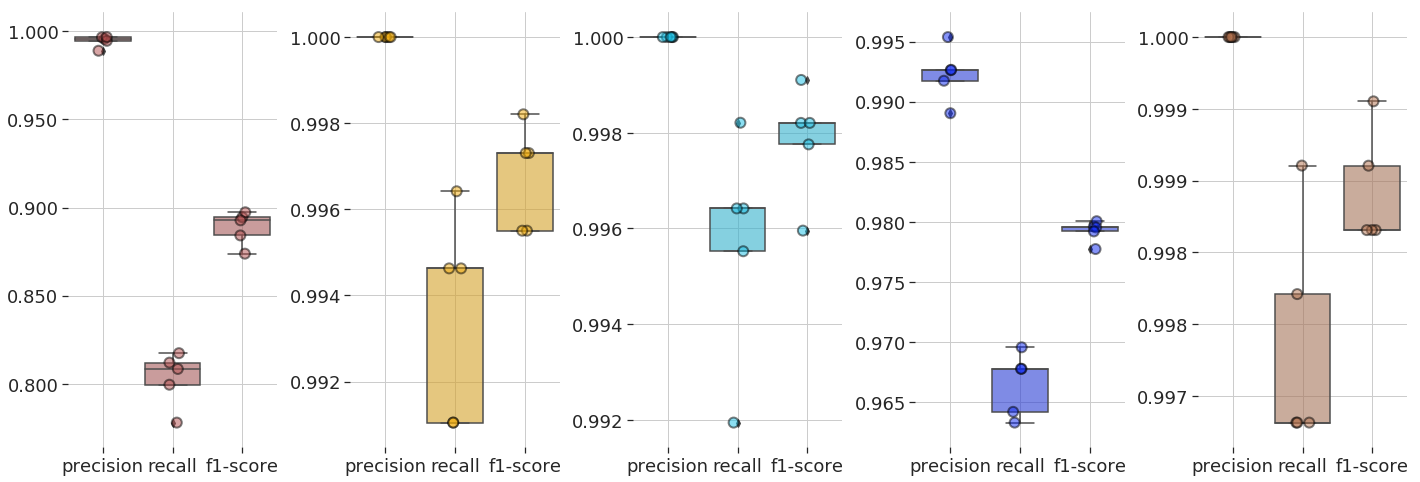

In [67]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharex=False, sharey=False, figsize=(24, 8))
fig.subplots_adjust(wspace=0.35, hspace=0.15)

sns.boxplot(data=awakemergedperf_df, ax = ax1, color = color_dict['awake'],)
sns.stripplot(data=awakemergedperf_df, ax = ax1, marker='o', linewidth=2, 
              edgecolor ="black", s= 10, color = color_dict['awake'], alpha = 0.5)

sns.boxplot(data=presleepmergedperf_df, ax = ax2, color = color_dict['presleep'],)
sns.stripplot(data=presleepmergedperf_df, ax = ax2, marker='o', linewidth=2, 
              edgecolor ="black", s= 10, color = color_dict['presleep'], alpha = 0.5)

sns.boxplot(data=earlysleepmergedperf_df, ax = ax3, color = color_dict['earlysleep'],)
sns.stripplot(data=earlysleepmergedperf_df, ax = ax3, marker='o', linewidth=2, 
              edgecolor ="black", s= 10, color = color_dict['earlysleep'], alpha = 0.5)

sns.boxplot(data=midsleepmergedperf_df, ax = ax4, color = color_dict['midsleep'],)
sns.stripplot(data=midsleepmergedperf_df, ax = ax4, marker='o', linewidth=2, 
              edgecolor ="black", s= 10, color = color_dict['midsleep'], alpha = 0.5)

sns.boxplot(data=latesleepmergedperf_df, ax = ax5, color = color_dict['latesleep'],)
sns.stripplot(data=latesleepmergedperf_df, ax = ax5, marker='o', linewidth=2, 
              edgecolor ="black", s= 10, color = color_dict['latesleep'], alpha = 0.5)


sns.despine(left=True, bottom = True)
ax1.tick_params(axis='both', which='major', labelsize=label_fontsize+2)
ax2.tick_params(axis='both', which='major', labelsize=label_fontsize+2)
ax3.tick_params(axis='both', which='major', labelsize=label_fontsize+2)
ax4.tick_params(axis='both', which='major', labelsize=label_fontsize+2)
ax5.tick_params(axis='both', which='major', labelsize=label_fontsize+2)


ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax5.grid(True)

for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))
    
for patch in ax2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))
    
for patch in ax3.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))
    
for patch in ax4.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))
    
for patch in ax5.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax4.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax5.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))


plt.savefig(outputfolderpath + 'rfclassifier_metrics.png', format='png', dpi=300, transparent=False,
    bbox_inches='tight')

In [68]:
from matplotlib.colors import LinearSegmentedColormap

In [69]:
cmap = LinearSegmentedColormap.from_list('RedGreenRed', ['crimson', 'lime'])

Normalized confusion matrix


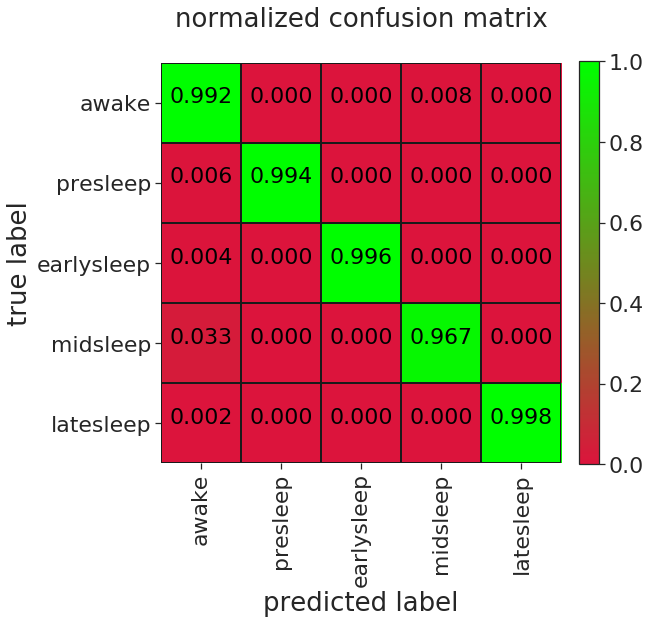

In [70]:
# Plot normalized confusion matrix
f, (ax1) = plt.subplots(ncols=1, sharex=True, sharey=True, figsize=(8, 8))

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(merged_ordered_cm, classes=np.asarray(ordered_classes), 
                      fig = f, ax = ax1,
                      normalize=True, cmap=cmap)
a = (merged_ordered_cm*0)+1
x,y = np.meshgrid(np.arange(a.shape[1]),np.arange(a.shape[0]))
m = np.c_[x[a.astype(bool)],y[a.astype(bool)]]
for pos in m:
    rect(pos)

for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))
sns.despine(left=True, bottom = True)


ax1.set_ylabel('true label', fontsize=label_fontsize+10)
ax1.set_xlabel('predicted label', fontsize=label_fontsize+10)
ax1.set_title('normalized confusion matrix\n', fontsize=label_fontsize+10)
ax1.tick_params(axis='both', which='major', labelsize=label_fontsize+6)
ax1.grid(False)
plt.box(False)

plt.savefig(outputfolderpath + 'rfclassifier_confmatrix.png', format='png', dpi=240, transparent=False,bbox_inches='tight')

In [71]:
feature_names = classifierfeat_df.columns[:-1]
feature_names

Index(['freq4.88_chan01', 'freq4.88_chan02', 'freq4.88_chan03',
       'freq4.88_chan04', 'freq4.88_chan05', 'freq4.88_chan06',
       'freq4.88_chan07', 'freq4.88_chan08', 'freq4.88_chan09',
       'freq4.88_chan10',
       ...
       'freq40.04_chan06', 'freq40.04_chan07', 'freq40.04_chan08',
       'freq40.04_chan09', 'freq40.04_chan10', 'freq40.04_chan11',
       'freq40.04_chan12', 'freq40.04_chan13', 'freq40.04_chan14',
       'freq40.04_chan15'],
      dtype='object', length=2175)

In [72]:
topfeature_len = 25

In [73]:
def compute_featimportance(best_grid_xx, x_test_xx, y_test_xx, randomstate_featimportance, feature_names):
    
    result_xx = permutation_importance(best_grid_xx, x_test_xx, y_test_xx, n_repeats=5, 
                                       random_state=randomstate_featimportance, n_jobs=-1)
    forest_importances_xx = pd.Series(result_xx.importances_mean, index=feature_names)

    forest_importances_df_xx = forest_importances_xx.to_frame().reset_index()
    forest_importances_df_xx = forest_importances_df_xx.rename({'index': 'freqchan', 0: 'value'}, axis=1)
    forest_importances_df_xx['freq'] = forest_importances_df_xx['freqchan'].str.split('_').str[0]
    forest_importances_df_xx['freq2'] = forest_importances_df_xx['freq'].str.split('freq').str[1]
    forest_importances_df_xx['chan'] = forest_importances_df_xx['freqchan'].str.split('_').str[1]
    forest_importances_df_xx['chan2'] = forest_importances_df_xx['chan'].str.split('chan').str[1]

    freqarray_xx = forest_importances_df_xx["freq2"].to_numpy()
    freqarray_xx = freqarray_xx.reshape(145, 15)
    freqarray_xx = freqarray_xx.astype(np.float)


    chanarray_xx = forest_importances_df_xx["chan2"].to_numpy()
    chanarray_xx = chanarray_xx.reshape(145, 15)

    perm_impvalues_xx = forest_importances_df_xx["value"].to_numpy()
    perm_impvalues_xx = perm_impvalues_xx.reshape(145, 15)

    cat_freqs_xx = np.sort(np.unique(freqarray_xx))
    
    return perm_impvalues_xx, freqarray_xx, chanarray_xx, cat_freqs_xx

In [74]:
permimpfilepath = classifierfolderpath + 'permimp_iter_01' + '.pkl'
if os.path.exists(permimpfilepath): 
    print('results loaded from disk..')
    perm_impvalues_01, freqarray_01, chanarray_01, cat_freqs_01 =\
                              pickle.load(open(permimpfilepath,"rb"))

else:
    perm_impvalues_01, freqarray_01, chanarray_01, cat_freqs_01 =\
            compute_featimportance(best_grid_01, x_test_01, y_test_01, 1, feature_names)
    pickle.dump([perm_impvalues_01, freqarray_01, chanarray_01, cat_freqs_01], 
                open(permimpfilepath, "wb"))

results loaded from disk..


In [75]:
permimpfilepath = classifierfolderpath + 'permimp_iter_02' + '.pkl'
if os.path.exists(permimpfilepath): 
    print('results loaded from disk..')
    perm_impvalues_02, freqarray_02, chanarray_02, cat_freqs_02 =\
                              pickle.load(open(permimpfilepath,"rb"))

else:
    perm_impvalues_02, freqarray_02, chanarray_02, cat_freqs_02 =\
            compute_featimportance(best_grid_02, x_test_02, y_test_02, 2, feature_names)
    pickle.dump([perm_impvalues_02, freqarray_02, chanarray_02, cat_freqs_02], 
                open(permimpfilepath, "wb"))

results loaded from disk..


In [76]:
permimpfilepath = classifierfolderpath + 'permimp_iter_03' + '.pkl'
if os.path.exists(permimpfilepath): 
    print('results loaded from disk..')
    perm_impvalues_03, freqarray_03, chanarray_03, cat_freqs_03 =\
                              pickle.load(open(permimpfilepath,"rb"))

else:
    perm_impvalues_03, freqarray_03, chanarray_03, cat_freqs_03 =\
            compute_featimportance(best_grid_03, x_test_03, y_test_03, 3, feature_names)
    pickle.dump([perm_impvalues_03, freqarray_03, chanarray_03, cat_freqs_03], 
                open(permimpfilepath, "wb"))

results loaded from disk..


In [77]:
permimpfilepath = classifierfolderpath + 'permimp_iter_04' + '.pkl'
if os.path.exists(permimpfilepath): 
    print('results loaded from disk..')
    perm_impvalues_04, freqarray_04, chanarray_04, cat_freqs_04 =\
                              pickle.load(open(permimpfilepath,"rb"))

else:
    perm_impvalues_04, freqarray_04, chanarray_04, cat_freqs_04 =\
            compute_featimportance(best_grid_04, x_test_04, y_test_04, 4, feature_names)
    pickle.dump([perm_impvalues_04, freqarray_04, chanarray_04, cat_freqs_04], 
                open(permimpfilepath, "wb"))

results loaded from disk..


In [78]:
permimpfilepath = classifierfolderpath + 'permimp_iter_05' + '.pkl'
if os.path.exists(permimpfilepath): 
    print('results loaded from disk..')
    perm_impvalues_05, freqarray_05, chanarray_05, cat_freqs_05 =\
                              pickle.load(open(permimpfilepath,"rb"))

else:
    perm_impvalues_05, freqarray_05, chanarray_05, cat_freqs_05 =\
            compute_featimportance(best_grid_05, x_test_05, y_test_05, 5, feature_names)
    pickle.dump([perm_impvalues_05, freqarray_05, chanarray_05, cat_freqs_05], 
                open(permimpfilepath, "wb"))

results loaded from disk..


In [79]:
merged_perm_impvalues = np.mean(np.array([perm_impvalues_01, perm_impvalues_02, perm_impvalues_03, 
                                          perm_impvalues_04, perm_impvalues_05]), axis=0 )

In [100]:
def plot_spect(data, ax, x, y, x_label, y_label, title, vmin = None, vmax = None, loc = None):
    
    im = ax.imshow(data,aspect='auto',interpolation='spline36',cmap='jet',vmin=vmin, vmax=vmax)
    
    y_mod = y
    freqs_plot = [5, 10, 15, 20, 25, 30, 35, 40]
    yticklocs = []
    for idx in freqs_plot:
        yticklocs.append(min(range(len(y_mod)), key=lambda i: abs(y_mod[i]-idx)))
    
    ytickvals = np.around(y[yticklocs])
    
    ydispvals = ['%.12g' % n for n in ytickvals]
    
    plt.yticks(yticklocs, ydispvals)
    xticklocs = np.arange(0,np.asarray(x.shape), step = 2)
    ax.set_xlim([0, np.asarray(x.shape)-1])
    tickval = np.arange(1,np.asarray(x.shape)+1, step = 2)
    plt.xticks(xticklocs, tickval)
    ax.set_xlabel(x_label, rotation=0,ha='center',va='center', fontsize=label_fontsize+6, labelpad=20)
    ax.set_ylabel(y_label, rotation=90,ha='center',va='center', fontsize=label_fontsize+6, labelpad=20)
    
    ax.invert_yaxis()
    
    cbarlabels = np.linspace(vmin, vmax, 5)
    
    if loc is not None:
        cbar = plt.colorbar(im, ax = [ax], ticks = cbarlabels, location = loc)
    else:
        cbar = plt.colorbar(im, ticks = cbarlabels)
      
    cbar.set_ticks(cbarlabels)
    cbar.set_ticklabels(["{:2.4f}".format(i) for i in cbarlabels])
    
    plt.title(title,ha='center',va='bottom', y=-0.5, fontsize=label_fontsize+6)
    
    cbar.ax.tick_params(labelsize=label_fontsize+4)
    plt.xticks(fontsize=label_fontsize+6)
    plt.yticks(fontsize=label_fontsize+6)

    return ax, cbar

In [101]:
# sorted_importance = forest_importances.sort_values(ascending = False)[0:topfeature_len-1]

In [102]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [103]:
outputfolderpath

'/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/SleepOnset_Drosophila'

In [104]:
outputfolderpath = '/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/SleepOnset_Drosophila/'

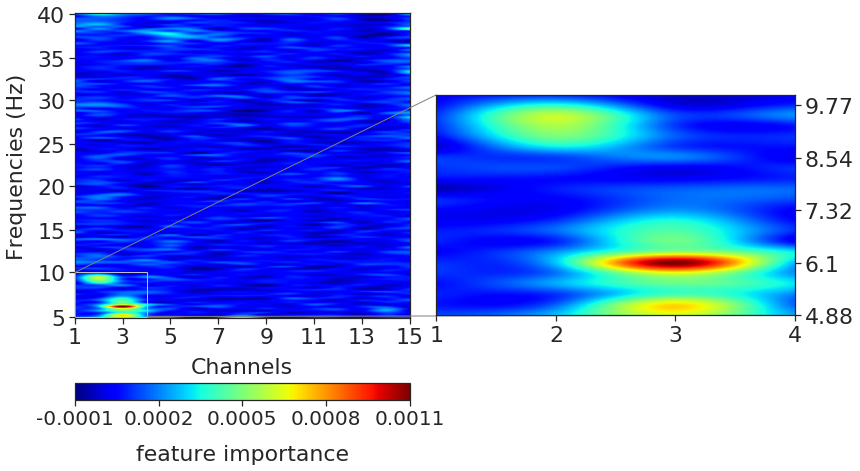

In [106]:
fig = plt.figure(figsize=(6, 8))
gs_main = gridspec.GridSpec(1, 1)
# gs_main.update(wspace=0.25, hspace=0.2)

gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_main[0])
ax1 = fig.add_subplot(gs[0])

ax1, cbar1 = plot_spect(merged_perm_impvalues, ax = ax1, x = np.arange(0,15), y = cat_freqs_01, 
                 x_label = 'Channels',y_label = 'Frequencies (Hz)' , title = 'feature importance',
                 vmin = np.round(np.min(merged_perm_impvalues),5), 
                 vmax = np.round(np.max(merged_perm_impvalues),5),
                 loc = 'bottom')


#axins = zoomed_inset_axes(ax1, 2, loc=5, bbox_to_anchor=(0, 0)) 
#axins = zoomed_inset_axes(ax1, 2, loc=10, bbox_to_anchor=(2000, 1928.5)) 
axins = zoomed_inset_axes(ax1, 5, loc=6, bbox_to_anchor=(410, 315))
#axins = zoomed_inset_axes(ax1, 5, loc='upper right', bbox_to_anchor=(545, 515)) 

axins, cbarins = plot_spect(merged_perm_impvalues, ax = axins, x = np.arange(0,15), y = cat_freqs_01, 
                   x_label = None, y_label = None, title = None,
                   vmin = np.round(np.min(merged_perm_impvalues),5), 
                   vmax = np.round(np.max(merged_perm_impvalues),5))

# sub region of the original image
x1, x2, y1, y2 = 0, 3, 0, 21
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)


xticklocs = np.arange(0,4, step = 1)
axins.set_xticks(xticklocs)
tickval = xticklocs + 1
axins.set_xticklabels(tickval)

yticklocs = np.arange(0,21, step = 5)
axins.set_yticks(yticklocs)
tickval = cat_freqs_01[yticklocs]
axins.set_yticklabels(tickval)
axins.yaxis.tick_right()
axins.yaxis.set_tick_params(labelsize=label_fontsize+6)

mark_inset(ax1, axins, loc1=2, loc2=4,  fc="none", ec="0.5")
cbarins.remove()

#frame1 = plt.gca()
#frame1.axes.xaxis.set_ticks([])
#frame1.axes.yaxis.set_ticks([])

ax1.indicate_inset_zoom(axins, edgecolor="white")

axins.apply_aspect()

plt.savefig(outputfolderpath + 'rfclassifier_all_featimportance.png', format='png', dpi=300, 
            transparent=False, bbox_inches = "tight")

plt.show()